In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")

In [3]:
from compute_costs import *

In [4]:
compute_costs(df)

C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_drugs"] = df_school["iptsc_drugs_used_school"] * df_school["drug_type"].map(cost_dict)
C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_consumables"] = df_school["cost_IPTsc_RDTs"] + df_schoo

In [5]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [6]:
school_marker = "o"
smc_marker = "s"

marker_dict = {i: school_marker for i in [6,7,8,9,10]}
marker_dict.update({i: smc_marker for i in [30,31,32,33]})

In [7]:
southcent_edgecolors = {
    6: "#009F89",
    7: "none",
    8: "#F28321",
    9: "none",
    5: "none"
}

southcent_facecolors = {
    6: "none",
    7: "#009F89",
    8: "none",
    9: "#F28321",
    5: "black",
}

southcent_colors = {
    6: "#009F89",
    7: "#009F89",
    8: "#F28321",
    9: "#F28321",
    5: "black",
}

sahel_edgecolors = {
    6: "#5192C2",
    7: "none",
    8: "#F28321",
    9: "none",
    5: "none",
    30: "#E8CA3F",
    31: "none",
    32: "#D41C5C",
    33: "none"
}

sahel_facecolors = {
    6: "none",
    7: "#5192C2",
    8: "none",
    9: "#F28321",
    5: "black",
    30: "none",
    31: "#E8CA3F",
    32: "none",
    33: "#D41C5C"
}

sahel_colors = {
    6: "#5192C2",
    7: "#5192C2",
    8: "#F28321",
    9: "#F28321",
    5: "black",
    30: "#E8CA3F",
    31: "#E8CA3F",
    32: "#D41C5C",
    33: "#D41C5C"
}

meta NOT subset; don't know how to subset; dropped


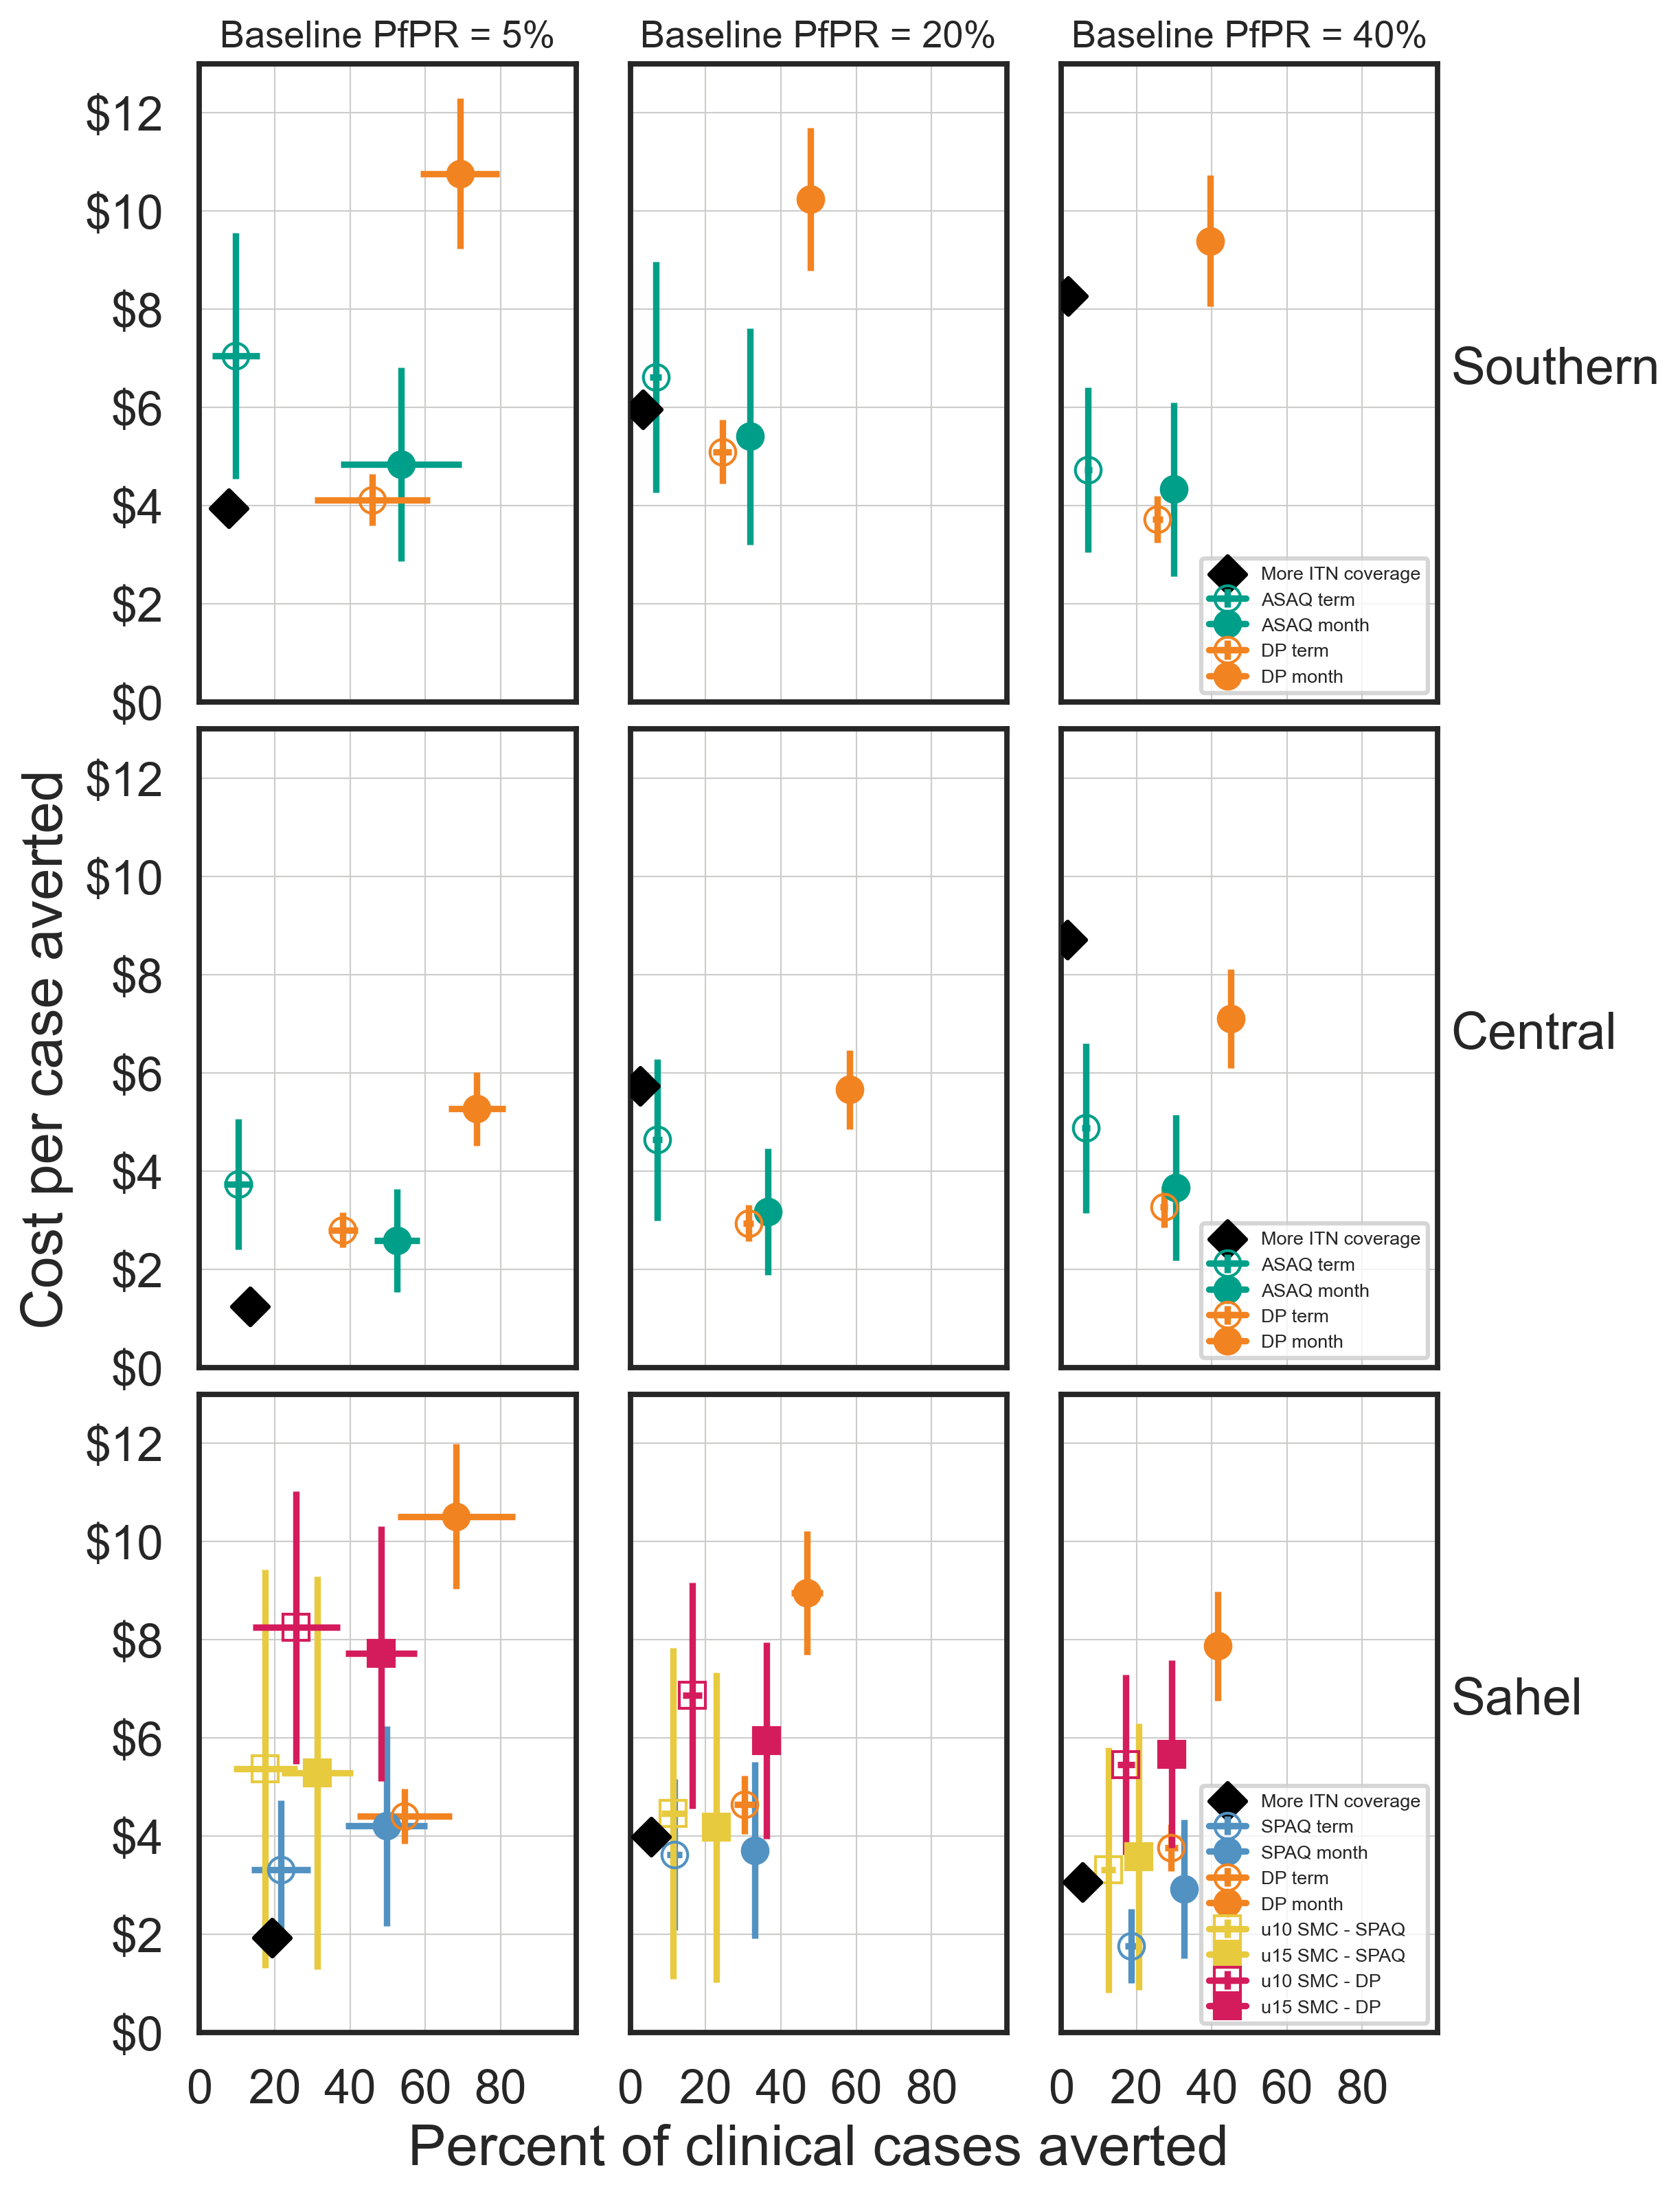

In [55]:
plt.close('all')
plt.figure(dpi=300, figsize=(8.5,11))

i = 1
for a in ["Southern", "Central", "Sahel"]:
    if a == "Sahel":
        scenario_numbers = [6,7,8,9,30,31,32,33]
        edgecolors = sahel_edgecolors
        facecolors = sahel_facecolors
        colors = sahel_colors
    else:
        scenario_numbers = [6,7,8,9]
        edgecolors = southcent_edgecolors
        facecolors = southcent_facecolors
        colors = southcent_colors
        
    for t in [0.05,0.2,0.4]:
        df_plot = df_pfpr[np.logical_and.reduce([
            df_pfpr["archetype"]==a,
            df_pfpr["transmission_level"]==t,
            np.in1d(df_pfpr["scenario_number"], scenario_numbers)])]
        
        plt.subplot(3,3,i)

        # plt.axhline(7.05, linestyle='dashed', color='#262626') # Cost to treat a case in health facility
        # plt.axhspan(3.35,10.75, alpha=0.3, color="#8672B4")
        
        # ITN only
        df_itn = df_pfpr[np.logical_and.reduce([
        df_pfpr["archetype"]==a,
        df_pfpr["transmission_level"]==t,
        np.in1d(df_pfpr["scenario_number"], [5])])]

        cases_averted = 5000*(df_itn["clinical_incidence_all_BASELINE"]-df_itn["clinical_incidence_all"])
        cost = df_itn["cost_ITNs"]-np.mean(df_plot["cost_ITNs"])
        frac_cases_averted = df_itn["frac_averted_clinical__all"]
        plt.scatter(100*frac_cases_averted, cost/cases_averted, label="More ITN coverage", color='black', marker='D', zorder=10)

        
        # IPTsc
        for s, sdf in df_plot.groupby("scenario_number"):
            if s in scenario_numbers:
                label = sdf["comments"].iloc[0]
                cases_averted = 5000*(sdf["clinical_incidence_all_BASELINE"]-sdf["clinical_incidence_all"])
                cost = 0.5*sdf["cost_IPTsc_mean"]
                frac_cases_averted = sdf["frac_averted_clinical__all"]
                
                plt.errorbar(100*frac_cases_averted, cost/cases_averted, 
                             yerr=0.5*(sdf["cost_IPTsc_high"]-sdf["cost_IPTsc_mean"])/cases_averted, 
                             xerr=100*sdf["frac_averted_clinical__all_STDEV"],
                             label=label, marker=marker_dict[sdf["scenario_number"].iloc[0]], c=colors[s], mfc=facecolors[s])
        
        plt.xlim([0,100])
        ytop = 13
        plt.ylim([0,ytop])
        
        

        
        if i == 1:
            plt.title("Baseline PfPR = 5%", fontsize=13)
        elif i == 2:
            plt.title("Baseline PfPR = 20%", fontsize=13)
        elif i == 3:
            plt.title("Baseline PfPR = 40%", fontsize=13)
        
        # Y-axis
        if i == 4:
            plt.ylabel("Cost per case averted", fontsize=20)
            # plt.ylabel("Cost per 1000 people (in thousands of dollars)", fontsize=20)
        else:
            plt.ylabel(None)
            
        # yticks = [0,2500,5000,7500,10000]
        yticks = [0,2,4,6,8,10,12]
        ytick_labels = ["$"+str(x) for x in yticks] 
        if i in [1,4,7]:
            plt.yticks(yticks, ytick_labels)
        else:
            plt.yticks([])
            plt.ylabel(None)
            
        for yt in yticks:
            plt.axhline(yt, c="#CCCCCB", zorder=0, lw=0.5)
        
        xticks = [0,20,40,60,80]
        xticks_without_origin = [0,20,40,60,80]
        if i == 7:
            plt.xticks(xticks)
        elif i in [8,9]:
            plt.xticks(xticks_without_origin)
        else:
            plt.xticks([])
            plt.xlabel(None)
            
        for xt in xticks:
            plt.axvline(xt, c="#CCCCCB", zorder=0, lw=0.5)
            
        # if i in [3,6,9]:
            # plt.legend(fontsize=11, loc="lower right")
        if i in [3,6,9]:
            plt.legend(fontsize=6.5, loc="lower right")
        else:
            plt.legend([],[], frameon=False)
        
        if i == 3:
            plt.text(103.5,ytop/2,"Southern")
        elif i == 6:
            plt.text(103.5,ytop/2,"Central")
        elif i == 9:
            plt.text(103.5,ytop/2,"Sahel")
            
        if i == 8:
            plt.xlabel("Percent of clinical cases averted", fontsize=20)
        else:
            plt.xlabel(None)
            
        i += 1
        
    # plt.axhline(base_cost/10, color='black', linestyle='dashed')
    # plt.scatter(itn_implementation_cost, itn_system_cost, color='black', marker='D', label="Increase ITN coverage")
plt.tight_layout(h_pad=0, w_pad=0.8)
plt.savefig("fig_s6_cost_per_case.pdf")
plt.savefig("fig_s6_cost_per_case.png")